#  Graduate Admissions

## Data pre-processing and exploratory analysis

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
warnings.filterwarnings('ignore')

### Importing data

In [2]:
data_source = "./data/Admission_Predict_Ver1.1.csv"
df = pd.read_csv(data_source)

### Getting to know data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Features
- gre_score
- toefl_score
- university_rating
- sop
- lor
- cgpa
- research

### Target
- chance_of_admit

In [6]:
# Renaming columns
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace(" ", "_")
df = df.rename(index=str, columns={"lor_": "lor", "chance_of_admit_": "chance_of_admit", "serial_no.": "index"});

In [7]:
#####Dropping "serial_no." as it is not needed
#####df = df.drop(columns = ['serial_no.'])

In [8]:
# Set Index
df.set_index('index', inplace=True)

In [9]:
df.head()

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
index,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
df.to_pickle(r'data/df.pkl')

## Exploratory data analysis

### Using a pairplot to visualize distribution of data and correlation among columns
- As we can see - toefl_score, gre_score and cgpa have linear relationship among themselves and with target chance_of_admit
- That means people who scored higher in gre, also scored higher in toefl and vice versa
- People with higher cgpa score higher in gre and toefl
- higher gre & toelf score means higher chance of admit

In [11]:
# sns.pairplot(df, hue = 'chance_of_admit') # uncommented to speed up compiling

### Correlation matrix
- Darker squares means higher correlation
- Best case scenario is having  many features having higher correlation with target, but lower correlation among themselves

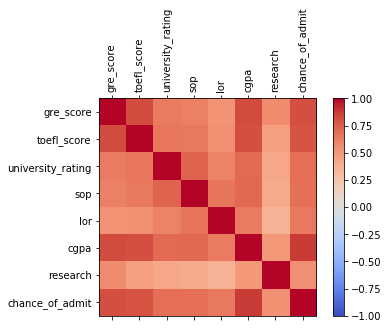

In [12]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

## Train-Test Split

Split data to independent variables matrix (X) and dependent variable vector (y)

In [13]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 7].values

Split data 

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

A couple of utility functions to plot the results from each model.

In [15]:
def plot_histogram(y_true,y_pred):
    plt.figure(figsize=(12,4))
    y_true.hist(bins=22, normed=True)
    y_pred.hist(bins=22, normed=True, alpha=0.5)
    
    
def plot_best_fit(y_true, y_pred, model_name):
    plt.figure(figsize=(12,8))
#     reorder = y_true.sort.index.tolist()
#     x_series = np.array(y_true[reorder])
#     y_series = np.array(y_pred[reorder])    
    x_series = np.array(y_true)
    y_series = np.array(y_pred)
    
    # Create scatter plot of 
    plt.xlim(0,1.1)
    plt.ylim(0,1.1)
    plt.scatter(x_series, y_series, s=30, alpha=0.2, marker='o')

    # Create line of best fit and confidence intervals
    par = np.polyfit(x_series, y_series, 1, full=True)
    slope=par[0][0]
    intercept=par[0][1]
    xl = [min(x_series), max(x_series)]
    yl = [slope*x + intercept for x in xl]

    # Determine error bounds
    yerr = [abs(slope*xx + intercept - yy) for xx,yy in zip(x_series,y_series)]
    par = np.polyfit(x_series, yerr, 2, full=True)
    yerrUpper = [(xx*slope+intercept)+(par[0][0]*xx**2 + par[0][1]*xx + par[0][2]) for xx,yy in zip(x_series,y_series)]
    yerrLower = [(xx*slope+intercept)-(par[0][0]*xx**2 + par[0][1]*xx + par[0][2]) for xx,yy in zip(x_series,y_series)]

    plt.plot(xl, yl, 'r')
    plt.plot(x_series, yerrLower, '--r')
    plt.plot(x_series, yerrUpper, '--r')

    plt.xlabel("Actual Admissions")
    plt.ylabel("{} Predictoins".format(model_name))    

# Modeling


## Linear Regression

In [16]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

X_train_lin_reg = X_train
y_train_lin_reg = y_train

Principal function that outputs the final optimized theta

In [17]:
def linear_regression(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = gradient_descent(theta,alpha,num_iters,h,X,y,n)
    return theta, cost

Function that calculates and outputs the hypothesis value of the target variable

In [18]:
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h

Function that performs the gradient descent algorithm

In [19]:
def gradient_descent(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) * sum((h-y) * X.transpose()[j])
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    theta = theta.reshape(1,n+1)
    return theta, cost

Feature scaling

In [20]:
mean_train = np.ones(X_train_lin_reg.shape[1])
std_train = np.ones(X_train_lin_reg.shape[1])
for i in range(0, X_train_lin_reg.shape[1]):
    mean_train[i] = np.mean(X_train_lin_reg.transpose()[i])
    std_train[i] = np.std(X_train_lin_reg.transpose()[i])
    for j in range(0, X_train_lin_reg.shape[0]):
        X_train_lin_reg[j][i] = (X_train_lin_reg[j][i] - mean_train[i])/std_train[i]   
        
mean_test = np.ones(X_test.shape[1])
std_test = np.ones(X_test.shape[1])
for i in range(0, X_test.shape[1]):
    mean_test[i] = np.mean(X_test.transpose()[i])
    std_test[i] = np.std(X_test.transpose()[i])
    for j in range(0, X_test.shape[0]):
        X_test[j][i] = (X_test[j][i] - mean_test[i])/std_test[i]      

Calling the principal function with learning_rate = 0.01

In [21]:
num_iters = 1000
theta, cost = linear_regression(X_train_lin_reg, y_train_lin_reg, 0.01, num_iters)

The reduction in the cost 

Text(0,0.5,'Cost')

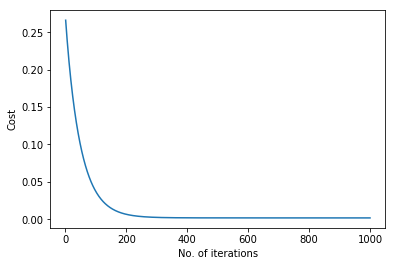

In [22]:
import matplotlib.pyplot as plt
cost = list(cost)
n_iterations = [x for x in range(1,num_iters+1)]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

Predictions:

In [23]:
X_test_lin_reg = np.concatenate((np.ones((X_test.shape[0],1)), X_test) ,axis = 1)
predictions_lin_reg = hypothesis(theta, X_test_lin_reg, X_test_lin_reg.shape[1] - 1)

In [24]:
print(np.sqrt(metrics.mean_squared_error(y_test, predictions_lin_reg)))

0.0618767204629624


Plot predictions and test data 

Text(0,0.5,'Chance of Admission')

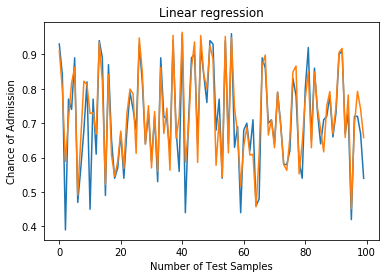

In [25]:
plt.plot(y_test.ravel(), '-', predictions_lin_reg, '-')
plt.title('Linear regression')
plt.xlabel('Number of Test Samples') 
plt.ylabel('Chance of Admission')

Test accurency:

In [26]:
output_error = y_test - predictions_lin_reg

error_lin_reg = np.mean(np.abs(output_error))
accuracy_lin_reg = (1 - error_lin_reg) * 100

print("Test Accuracy " + str(round(accuracy_lin_reg,2)) + "%")

Test Accuracy 95.75%


Save results to csv file

In [27]:
output_col_order = ['ChanceOfAdmit', 'Predicted', 'Delta']
result_lin_reg = pd.DataFrame({'ChanceOfAdmit':y_test,
                               'Predicted':predictions_lin_reg,
                               'Delta': abs(y_test - predictions_lin_reg)})
                        
result_lin_reg[output_col_order].to_csv('results/LinearRegression.csv', index=False)

### Feature engineering # 1

We chose 'gre score', 'toefl score', and 'cgpa' columns that seemed the most important in getting admitted

In [28]:
X_lin_reg_fe1 = df[['gre_score', 'toefl_score', 'cgpa']]
X_lin_reg_fe1 = X_lin_reg_fe1.iloc[:,:].values
y_lin_reg_fe1 = y

Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train_lin_reg_fe1, X_test_lin_reg_fe1, y_train_lin_reg_fe1, y_test_lin_reg_fe1 = train_test_split(X_lin_reg_fe1, y_lin_reg_fe1, test_size=0.2, random_state = 42)

Feature scaling

In [30]:
mean_train_fe1 = np.ones(X_train_lin_reg_fe1.shape[1])
std_train_fe1 = np.ones(X_train_lin_reg_fe1.shape[1])
for i in range(0, X_train_lin_reg_fe1.shape[1]):
    mean_train_fe1[i] = np.mean(X_train_lin_reg_fe1.transpose()[i])
    std_train_fe1[i] = np.std(X_train_lin_reg_fe1.transpose()[i])
    for j in range(0, X_train_lin_reg_fe1.shape[0]):
        X_train_lin_reg_fe1[j][i] = (X_train_lin_reg_fe1[j][i] - mean_train_fe1[i])/std_train_fe1[i]
        
mean_test_fe1 = np.ones(X_test_lin_reg_fe1.shape[1])
std_test = np.ones(X_test_lin_reg_fe1.shape[1])
for i in range(0, X_test_lin_reg_fe1.shape[1]):
    mean_test[i] = np.mean(X_test_lin_reg_fe1.transpose()[i])
    std_test[i] = np.std(X_test_lin_reg_fe1.transpose()[i])
    for j in range(0, X_test_lin_reg_fe1.shape[0]):
        X_test_lin_reg_fe1[j][i] = (X_test_lin_reg_fe1[j][i] - mean_test[i])/std_test[i]

Calling the principal function with learning_rate = 0.01

In [31]:
num_iters = 1000
theta_reg_fe1, cost_reg_fe1 = linear_regression(X_train_lin_reg_fe1, y_train_lin_reg_fe1, 0.01, num_iters)

Predictions:

In [32]:
X_test_lin_reg_fe1 = np.concatenate((np.ones((X_test_lin_reg_fe1.shape[0],1)), X_test_lin_reg_fe1) ,axis = 1)
predictions_lin_reg_fe1 = hypothesis(theta_reg_fe1, X_test_lin_reg_fe1, X_test_lin_reg_fe1.shape[1] - 1)

In [33]:
print(np.sqrt(metrics.mean_squared_error(y_test, predictions_lin_reg_fe1)))

0.06610037031580543


Text(0,0.5,'Chance of Admission')

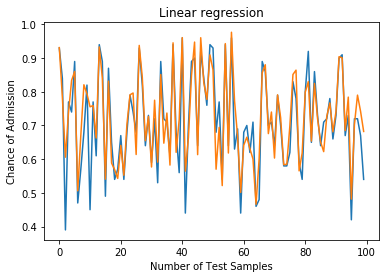

In [34]:
plt.plot(y_test.ravel(), '-', predictions_lin_reg_fe1, '-')
plt.title('Linear regression')
plt.xlabel('Number of Test Samples') 
plt.ylabel('Chance of Admission')

In [35]:
output_error_fe1 = y_test - predictions_lin_reg_fe1

error_lin_reg_fe1 = np.mean(np.abs(output_error_fe1))
accuracy_lin_reg_fe1 = (1 - error_lin_reg_fe1) * 100

print("Test Accuracy " + str(round(accuracy_lin_reg_fe1,2)) + "%")

Test Accuracy 95.44%


### Feature engineering # 2

We chose only 'gre score', and 'cgpa' columns that seemed the most important in getting admitted

In [36]:
X_lin_reg_fe2 = df[['gre_score', 'cgpa']]
X_lin_reg_fe2 = X_lin_reg_fe2.iloc[:,:].values
y_lin_reg_fe2 = y

Train-Test Split

In [37]:
from sklearn.model_selection import train_test_split
X_train_lin_reg_fe2, X_test_lin_reg_fe2, y_train_lin_reg_fe2, y_test_lin_reg_fe2 = train_test_split(X_lin_reg_fe2, y_lin_reg_fe2, test_size=0.2, random_state = 42)

Feature scaling

In [38]:
mean_train_fe2 = np.ones(X_train_lin_reg_fe2.shape[1])
std_train_fe2 = np.ones(X_train_lin_reg_fe2.shape[1])
for i in range(0, X_train_lin_reg_fe2.shape[1]):
    mean_train_fe2[i] = np.mean(X_train_lin_reg_fe2.transpose()[i])
    std_train_fe2[i] = np.std(X_train_lin_reg_fe2.transpose()[i])
    for j in range(0, X_train_lin_reg_fe2.shape[0]):
        X_train_lin_reg_fe2[j][i] = (X_train_lin_reg_fe2[j][i] - mean_train_fe2[i])/std_train_fe2[i]
        
mean_test_fe2 = np.ones(X_test_lin_reg_fe2.shape[1])
std_test = np.ones(X_test_lin_reg_fe2.shape[1])
for i in range(0, X_test_lin_reg_fe2.shape[1]):
    mean_test[i] = np.mean(X_test_lin_reg_fe2.transpose()[i])
    std_test[i] = np.std(X_test_lin_reg_fe2.transpose()[i])
    for j in range(0, X_test_lin_reg_fe2.shape[0]):
        X_test_lin_reg_fe2[j][i] = (X_test_lin_reg_fe2[j][i] - mean_test[i])/std_test[i]

Calling the principal function with learning_rate = 0.01

In [39]:
num_iters = 1000
theta_reg_fe2, cost_reg_fe2 = linear_regression(X_train_lin_reg_fe2, y_train_lin_reg_fe2, 0.01, num_iters)

Text(0,0.5,'Cost')

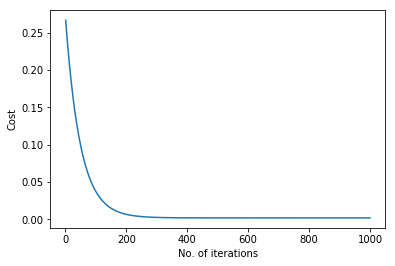

In [40]:
import matplotlib.pyplot as plt
cost_reg_fe2 = list(cost_reg_fe2)
n_iterations = [x for x in range(1,num_iters+1)]
plt.plot(n_iterations, cost_reg_fe2)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

Predictions:

In [41]:
X_test_lin_reg_fe2 = np.concatenate((np.ones((X_test_lin_reg_fe2.shape[0],1)), X_test_lin_reg_fe2) ,axis = 1)
predictions_lin_reg_fe2 = hypothesis(theta_reg_fe2, X_test_lin_reg_fe2, X_test_lin_reg_fe2.shape[1] - 1)

In [42]:
print(np.sqrt(metrics.mean_squared_error(y_test, predictions_lin_reg_fe2)))

0.0662220061059784


Text(0,0.5,'Chance of Admission')

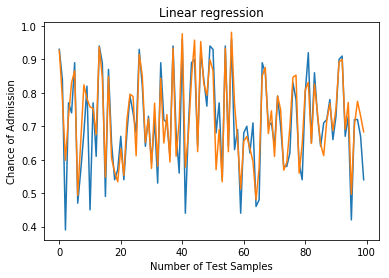

In [43]:
plt.plot(y_test.ravel(), '-', predictions_lin_reg_fe2, '-')
plt.title('Linear regression')
plt.xlabel('Number of Test Samples') 
plt.ylabel('Chance of Admission')

In [44]:
output_error_fe2 = y_test - predictions_lin_reg_fe2

error_lin_reg_fe2 = np.mean(np.abs(output_error_fe2))
accuracy_lin_reg_fe2 = (1 - error_lin_reg_fe2) * 100

print("Test Accuracy " + str(round(accuracy_lin_reg_fe2,2)) + "%")

Test Accuracy 95.36%


# Modeling


## XGBoost

[XGBoost](http://xgboost.readthedocs.io/en/latest/) is perhaps the most popular package for modelling in Kaggle competitions as it is extremely fast and provides state-of-the-art performance with gradient boosting.

In [45]:
#Install code ran in Anaconda Prompt:
#pip install xgboost

In [46]:
import xgboost as xgb

In [47]:
params = {'max_depth':4,
          'subsample':1.0,
          'colsample_bytree':1.0,
          'min_child_weight':20,
          'eta':0.02,
          'silent':1,
          'objective':'count:poisson',
          'eval_metric':'mae',
          'seed': 9753}
num_rounds=500

In [48]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
watchlist = [(dtrain,'train'), (dtest, 'eval')]
bst = xgb.train(params.items(), dtrain, num_rounds, watchlist, early_stopping_rounds=50)

[0]	train-mae:0.231017	eval-mae:0.219083
Multiple eval metrics have been passed: 'eval-mae' will be used for early stopping.

Will train until eval-mae hasn't improved in 50 rounds.
[1]	train-mae:0.228873	eval-mae:0.216989
[2]	train-mae:0.226747	eval-mae:0.21487
[3]	train-mae:0.224644	eval-mae:0.212818
[4]	train-mae:0.222566	eval-mae:0.210767
[5]	train-mae:0.220513	eval-mae:0.208751
[6]	train-mae:0.218471	eval-mae:0.206758
[7]	train-mae:0.216457	eval-mae:0.204782
[8]	train-mae:0.214453	eval-mae:0.202793
[9]	train-mae:0.212487	eval-mae:0.200855
[10]	train-mae:0.210542	eval-mae:0.198938
[11]	train-mae:0.208615	eval-mae:0.197
[12]	train-mae:0.206715	eval-mae:0.195118
[13]	train-mae:0.204836	eval-mae:0.193257
[14]	train-mae:0.202969	eval-mae:0.191417
[15]	train-mae:0.201115	eval-mae:0.189533
[16]	train-mae:0.199287	eval-mae:0.18771
[17]	train-mae:0.197474	eval-mae:0.185863
[18]	train-mae:0.195693	eval-mae:0.184091
[19]	train-mae:0.193919	eval-mae:0.182279
[20]	train-mae:0.192162	eval-mae:0

[191]	train-mae:0.056126	eval-mae:0.055071
[192]	train-mae:0.055857	eval-mae:0.054855
[193]	train-mae:0.055594	eval-mae:0.054673
[194]	train-mae:0.055333	eval-mae:0.05448
[195]	train-mae:0.055076	eval-mae:0.054261
[196]	train-mae:0.054822	eval-mae:0.054075
[197]	train-mae:0.054571	eval-mae:0.053894
[198]	train-mae:0.054317	eval-mae:0.053703
[199]	train-mae:0.054071	eval-mae:0.053518
[200]	train-mae:0.053828	eval-mae:0.053325
[201]	train-mae:0.053591	eval-mae:0.053158
[202]	train-mae:0.053353	eval-mae:0.052985
[203]	train-mae:0.053119	eval-mae:0.052801
[204]	train-mae:0.052893	eval-mae:0.052646
[205]	train-mae:0.05266	eval-mae:0.052485
[206]	train-mae:0.052429	eval-mae:0.052327
[207]	train-mae:0.052205	eval-mae:0.052144
[208]	train-mae:0.051984	eval-mae:0.051976
[209]	train-mae:0.051761	eval-mae:0.051822
[210]	train-mae:0.051544	eval-mae:0.051645
[211]	train-mae:0.051326	eval-mae:0.051494
[212]	train-mae:0.051115	eval-mae:0.051334
[213]	train-mae:0.050902	eval-mae:0.051187
[214]	train-m

[383]	train-mae:0.035501	eval-mae:0.04449
[384]	train-mae:0.035474	eval-mae:0.044491
[385]	train-mae:0.035446	eval-mae:0.044497
[386]	train-mae:0.035427	eval-mae:0.0445
[387]	train-mae:0.035402	eval-mae:0.044504
[388]	train-mae:0.035377	eval-mae:0.044508
[389]	train-mae:0.035355	eval-mae:0.044507
[390]	train-mae:0.035337	eval-mae:0.04451
[391]	train-mae:0.035311	eval-mae:0.044512
[392]	train-mae:0.035294	eval-mae:0.044523
[393]	train-mae:0.035272	eval-mae:0.044522
[394]	train-mae:0.035248	eval-mae:0.044528
[395]	train-mae:0.035232	eval-mae:0.044534
[396]	train-mae:0.035208	eval-mae:0.044539
[397]	train-mae:0.035191	eval-mae:0.044544
[398]	train-mae:0.035169	eval-mae:0.044544
[399]	train-mae:0.035154	eval-mae:0.04455
[400]	train-mae:0.035126	eval-mae:0.044547
[401]	train-mae:0.035104	eval-mae:0.044553
[402]	train-mae:0.035085	eval-mae:0.044567
[403]	train-mae:0.035057	eval-mae:0.044557
[404]	train-mae:0.035038	eval-mae:0.044557
[405]	train-mae:0.03502	eval-mae:0.044577
[406]	train-mae:0

In [49]:
y_xgb = bst.predict(xgb.DMatrix(X_test), ntree_limit=bst.best_ntree_limit)
y_xgb = pd.Series(y_xgb, name='Pred_XGBoost')#, index=X_test.index

In [50]:
y_xgb.describe()

count    100.000000
mean       0.717511
std        0.128085
min        0.456305
25%        0.618870
50%        0.704594
75%        0.820207
max        0.934448
Name: Pred_XGBoost, dtype: float64

In [57]:
output_col_order = ['ChanceOfAdmit', 'Predicted', 'Delta']
result_xgboost = pd.DataFrame({'ChanceOfAdmit':y_test,
                               'Predicted':y_xgb,
                               'Delta': abs(y_test - y_xgb)})

result_xgboost[output_col_order].to_csv('results/XGBoost.csv', index=False)

# Modeling


## Negative Binomial


                 Generalized Linear Model Regression Results                  
Dep. Variable:             Acceptence   No. Observations:                  400
Model:                            GLM   Df Residuals:                      393
Model Family:        NegativeBinomial   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -467.11
Date:                Mon, 13 May 2019   Deviance:                       2.5764
Time:                        17:14:19   Pearson chi2:                     2.42
No. Iterations:                     4   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GRE           -0.0094      0.009     -1.067      0.286      -0.027       0.008
TOEFL          0.0054      0.024      0.223      0.

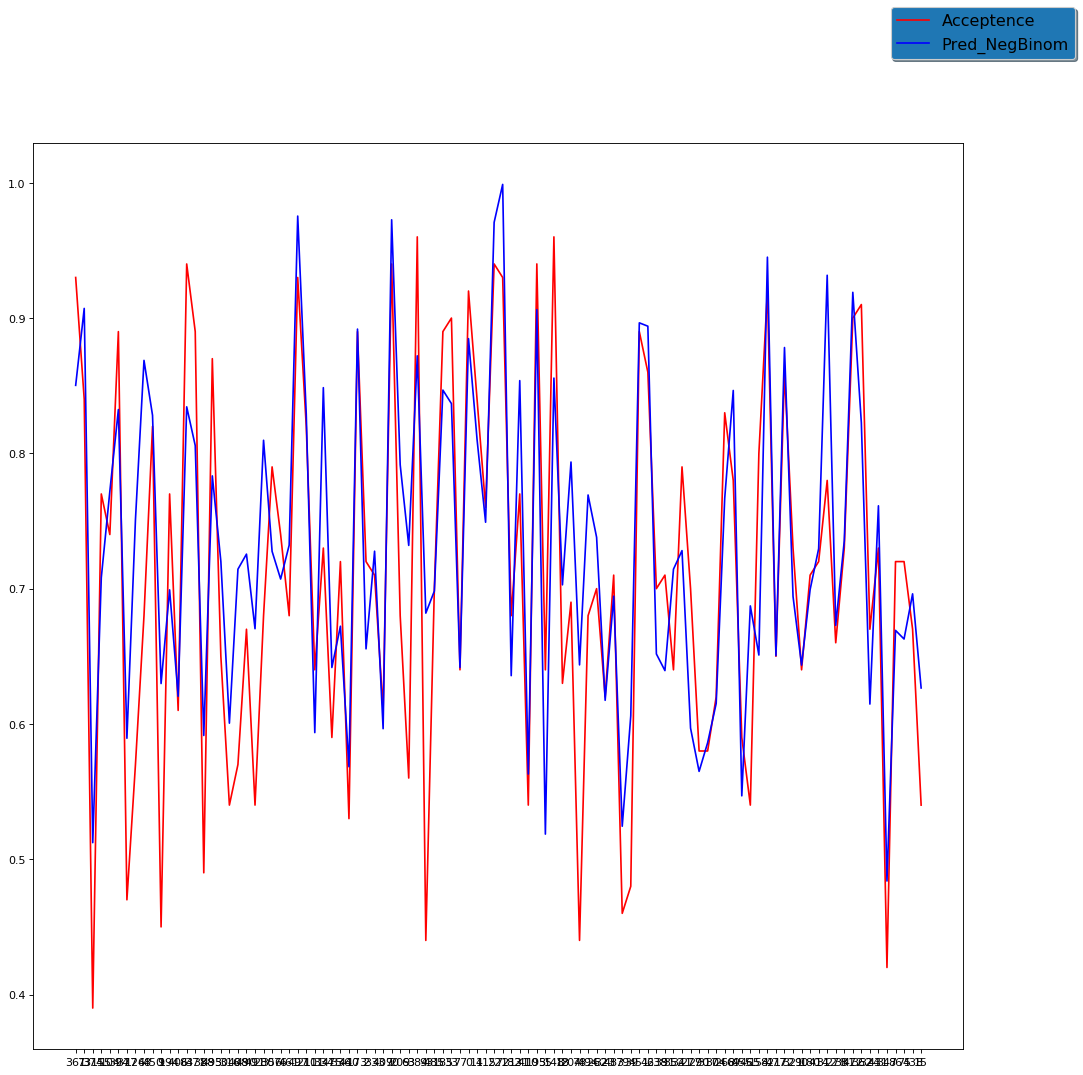

In [71]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

data_source = "./data/Admission_Predict_Ver1.1.csv"
df = pd.read_csv(data_source)

df.rename(index=str, columns={"Chance of Admit ":"Acceptence", "GRE Score":"GRE", "TOEFL Score":"TOEFL", "University Rating":"UR"}, inplace = True)
df.drop(["Serial No."], axis=1, inplace=True)

Y = df["Acceptence"].copy(deep=True)
X = df.copy().drop(columns=["Acceptence"])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

#modelP = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
modelNB = sm.GLM(y_train, X_train, family=sm.families.NegativeBinomial()).fit()

#print(modelP.summary())
print()
print(modelNB.summary())

#y_p = modelP.predict(X_test)
y_nb = modelNB.predict(X_test)

y_nb = pd.Series(y_nb, name='Pred_NegBinom')
#y_p = pd.Series(y_p, name='Pred_Poisson')

for i in range(0,len(y_nb)):
    y_nb[i] = y_nb[i]
    
#print("Poisson -->")
#print(accuracy_score(y_test.round(), np.rint(y_p)), mean_absolute_error(y_test, np.rint(y_p)))
print()
print("Negative Binomial -->")
print(accuracy_score(y_test.round(), np.rint(y_nb)), mean_absolute_error(y_test, np.rint(y_nb)))

#modelP = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit_regularized() 

#modelNB = sm.GLM(y_train, X_train, family=sm.families.NegativeBinomial()).fit_regularized()

fig=plt.figure(figsize=(15, 15), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(y_test, 'r')
plt.plot(y_nb, 'b')
#plt.plot(y_p, 'go')
legend = fig.legend(loc='upper right', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C0')
plt.show()

output_col_order = ["ChanceOfAdmit", "Predicted", "Delta"]
result_neg_binom = pd.DataFrame({"ChanceOfAdmit":y_test,
                              "Predicted":y_nb,
                              "Delta":abs(y_test - y_nb)})

result_neg_binom.to_csv("results/NegativeBinomial.csv", index=False)

# Ridge Regression


Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity.
Multicollinearity is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy.

In [10]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm as cm
from numpy import linalg as LA

%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sp
import numpy as np
from sklearn.model_selection import train_test_split
import itertools

from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor    


## Detecting multicollinearity

### 1. Studying pairwise scatter plots 
We take a look at scatter plots of pairs of independent variables. 
We consider 'GRE', 'TOEFL', 'CGPA' because logically it's suggestive that the three may have some correlation


(500, 9)


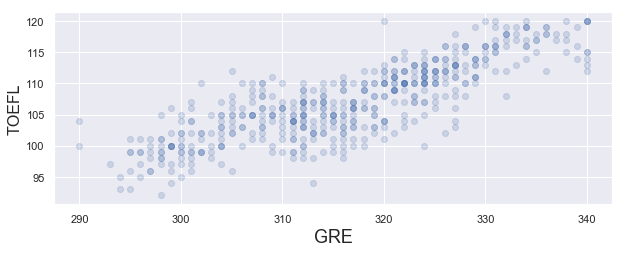

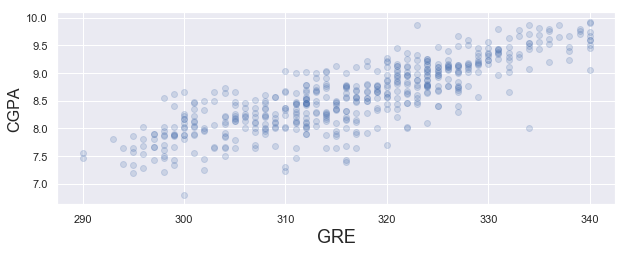

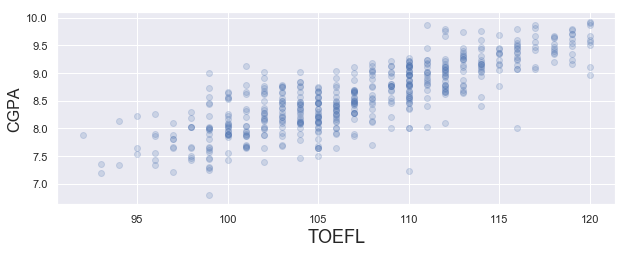

In [11]:
scatter_plot_headers = list(itertools.combinations(['GRE', 'TOEFL','CGPA'], 2))

sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif')

df = pd.read_csv("./data/Admission_Predict_Ver1.1.csv")
print(df.shape)

df.rename(index=str, columns={"Chance of Admit ":"Acceptence", "GRE Score":"GRE", "TOEFL Score":"TOEFL", "University Rating":"UR"}, inplace = True)
df.drop(["Serial No."], axis=1, inplace=True)
df.head()

Y = df["Acceptence"].copy(deep=True)
X = df.copy().drop(columns=["Acceptence"])

for i in range(0, len(scatter_plot_headers)):
    x = df[scatter_plot_headers[i][0]]
    y = df[scatter_plot_headers[i][1]]
    
    figure(figsize=(10,12))
    plt.subplot(len(scatter_plot_headers), 1, i+1)
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel(scatter_plot_headers[i][0], fontsize=18)
    plt.ylabel(scatter_plot_headers[i][1], fontsize=16)
    plt.show()



    A cursory look at the scatter plots hint at the presence of multicollinearity. 
    However, multicollinearity does not always show up when considering two variables at a time. We need to take a few more steps before we confirm multicollinearity


### 2. Correlation matrix

Construction of a correlation matrix among the explanatory variables will yield indications as to the likelihood that any given couplet of right-hand-side variables are creating multicollinearity problems. Correlation values (off-diagonal elements) of at least 0.4 are sometimes interpreted as indicating a multicollinearity problem.

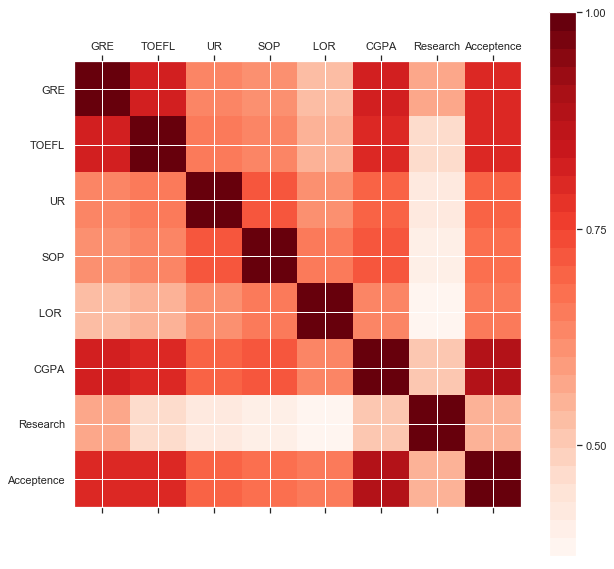

In [12]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    cmap = cm.get_cmap('Reds', 30)
    cax = ax.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    fig.colorbar(cax, ticks=[0, 0.25, 0.5, 0.75, 1])

plot_corr(df)

    We can see there's significantly high correlation (>0.45) between 'GRE' and 'TOEFL', 'CGPA' and 'GRE', and 'TOEFL' and 'CGPA'

### 3. Condition Number

A large condition number suggests multicollinearity.

In [13]:
LA.cond(X)

1216.2038967297117

As we can see, the condition number is significantly high for this matrix and it's an indication that strong mulitcollinearity exists.

### 4. Variance Inflation Factors (VIF)

The Variance Inflation Factor (VIF) is a measure for the increase of the variance of the parameter estimates if an additional variable is added to the linear regression. It is a measure for multicollinearity of our dataframe.

VIF is the ratio of variance in a model with multiple terms, divided by the variance of a model with one term alone
It quantifies the severity of multicollinearity and provides an index that measures how much the variance of an estimated regression coefficient is increased because of collinearity.





In [14]:
for i in range(0, len(list(X.columns))):
    print('VIF for '+ X.columns[i]+': '+repr(variance_inflation_factor(X.values, i)))

VIF for GRE: 1308.0610888465158
VIF for TOEFL: 1215.9518983651624
VIF for UR: 20.933360945720892
VIF for SOP: 35.265005604600034
VIF for LOR : 30.91147635400442
VIF for CGPA: 950.8179853694207
VIF for Research: 2.8694933174820076


    A VIF > 5 is indication that the particular explanatory variable is highly collinear with other explanatory variables. When a variable is independent, it is not affected at all by any other variables. When a variable isn't independent for certain, it's an explanatory variable.

## Building the Ridge Regression model

Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity. When
multicollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from
the true value. By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors.
It is hoped that the net effect will be to give estimates that are more reliable. 

### Test-train split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

### Ridge Regression Model

In [18]:
ridge = Ridge(alpha=100)
ridge.fit(X_train,Y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

### Predicting values using the model

In [20]:
Y_ridge = ridge.predict(X_test)
Y_ridge = pd.DataFrame(Y_ridge, index=X_test.index, columns=['Pred_A'])

In [26]:
ChanceOfAdmit = pd.DataFrame(df, index=X_test.index, columns=['Acceptence'])

In [27]:
output_col_order = ['ChanceOfAdmit', 'Predicted', 'Delta']
result_ridge_reg = pd.DataFrame(index= X_test.index, columns=output_col_order)


In [28]:
result_ridge_reg['ChanceOfAdmit'] = ChanceOfAdmit
result_ridge_reg['Predicted'] = Y_ridge
result_ridge_reg['Delta'] = result_ridge_reg['ChanceOfAdmit']-result_ridge_reg['Predicted']

In [24]:
result_ridge_reg[output_col_order].to_csv('Ridge_Regression.csv', index=False)

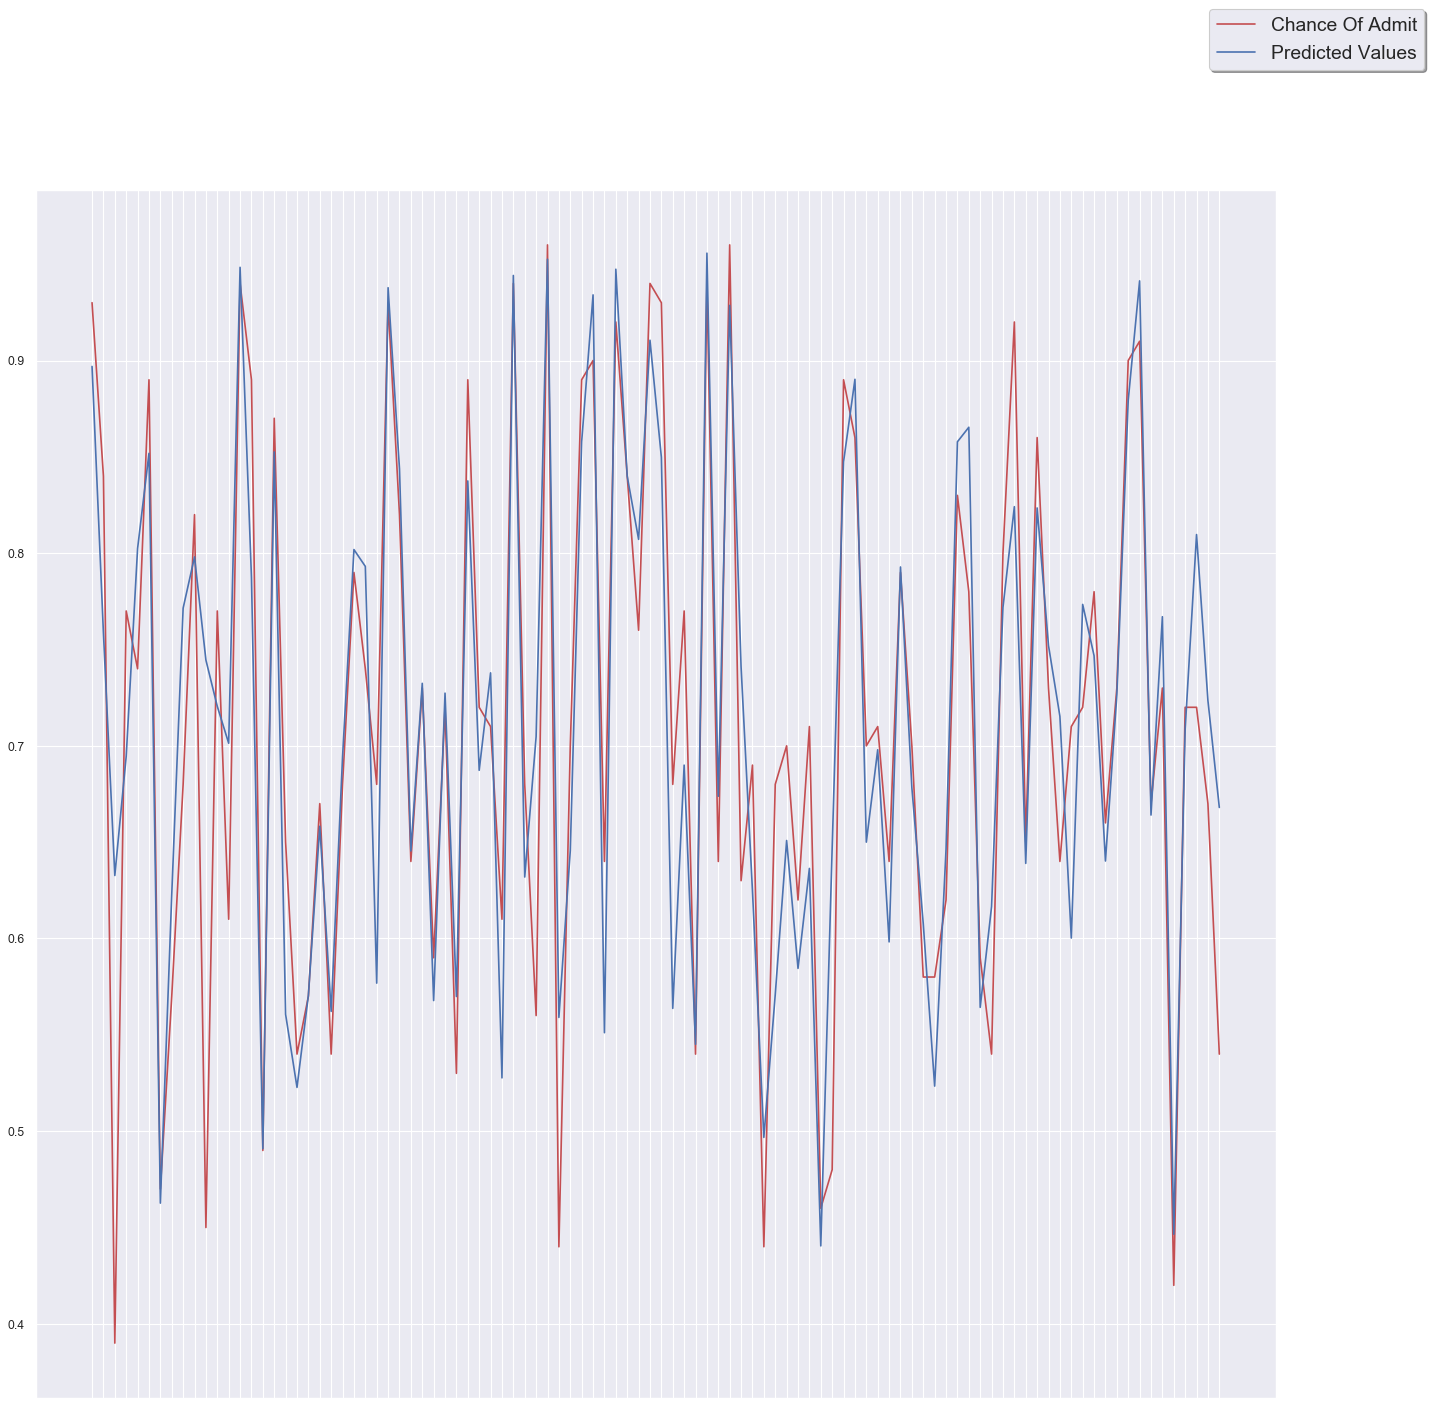

In [48]:
fig =plt.figure(figsize=(20, 20), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(ChanceOfAdmit, 'r', label='Chance Of Admit')
plt.plot(Y_ridge, 'b', label='Predicted Values')
#plt.plot(y_p, 'go')
legend = fig.legend(loc='upper right', shadow=True, fontsize='x-large')
ax = fig.gca()
ax.set_xticklabels([])
plt.show()
